In [23]:
%load_ext autoreload
%autoreload 2
%pylab inline

from collections import defaultdict, OrderedDict, Counter
from copy import deepcopy
import time
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import poisson
from datetime import date, datetime
from common.databases.mdb import Reader
import uuid
import os
import ujson
import requests
from PIL import Image
import io
import tensorflow as tf
import pickle

from statoil import cfg
from statoil.utils import json_load, print_info, pickle_load
from statoil.project_utils import  plot_examples
from statoil.evaluator import Evaluator


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/prinda/.pyenv/versions/3.5.2/envs/py3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'poisson']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Define and load experiment

In [24]:
devset_file = cfg.EXPERIMENTS_DIR + "BN_poolEverywhere/dev_predictions.pkl"

devset = pickle_load(devset_file)
evaluator = Evaluator(devset)

# Metrics

In [25]:
evaluator.plot_confusion_matrix()

True
     Predict
[[139  11]
 [ 21 150]]


In [53]:
evaluator.get_log_loss()

0.22130392844289376

In [50]:
y_true, y_pred = zip(*[(example["is_iceberg"], example["p"]) for example in devset])
print(y_true)
print(y_pred)

(1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1)
(0.99977607, 0.00079349469, 0.809681

# False positives

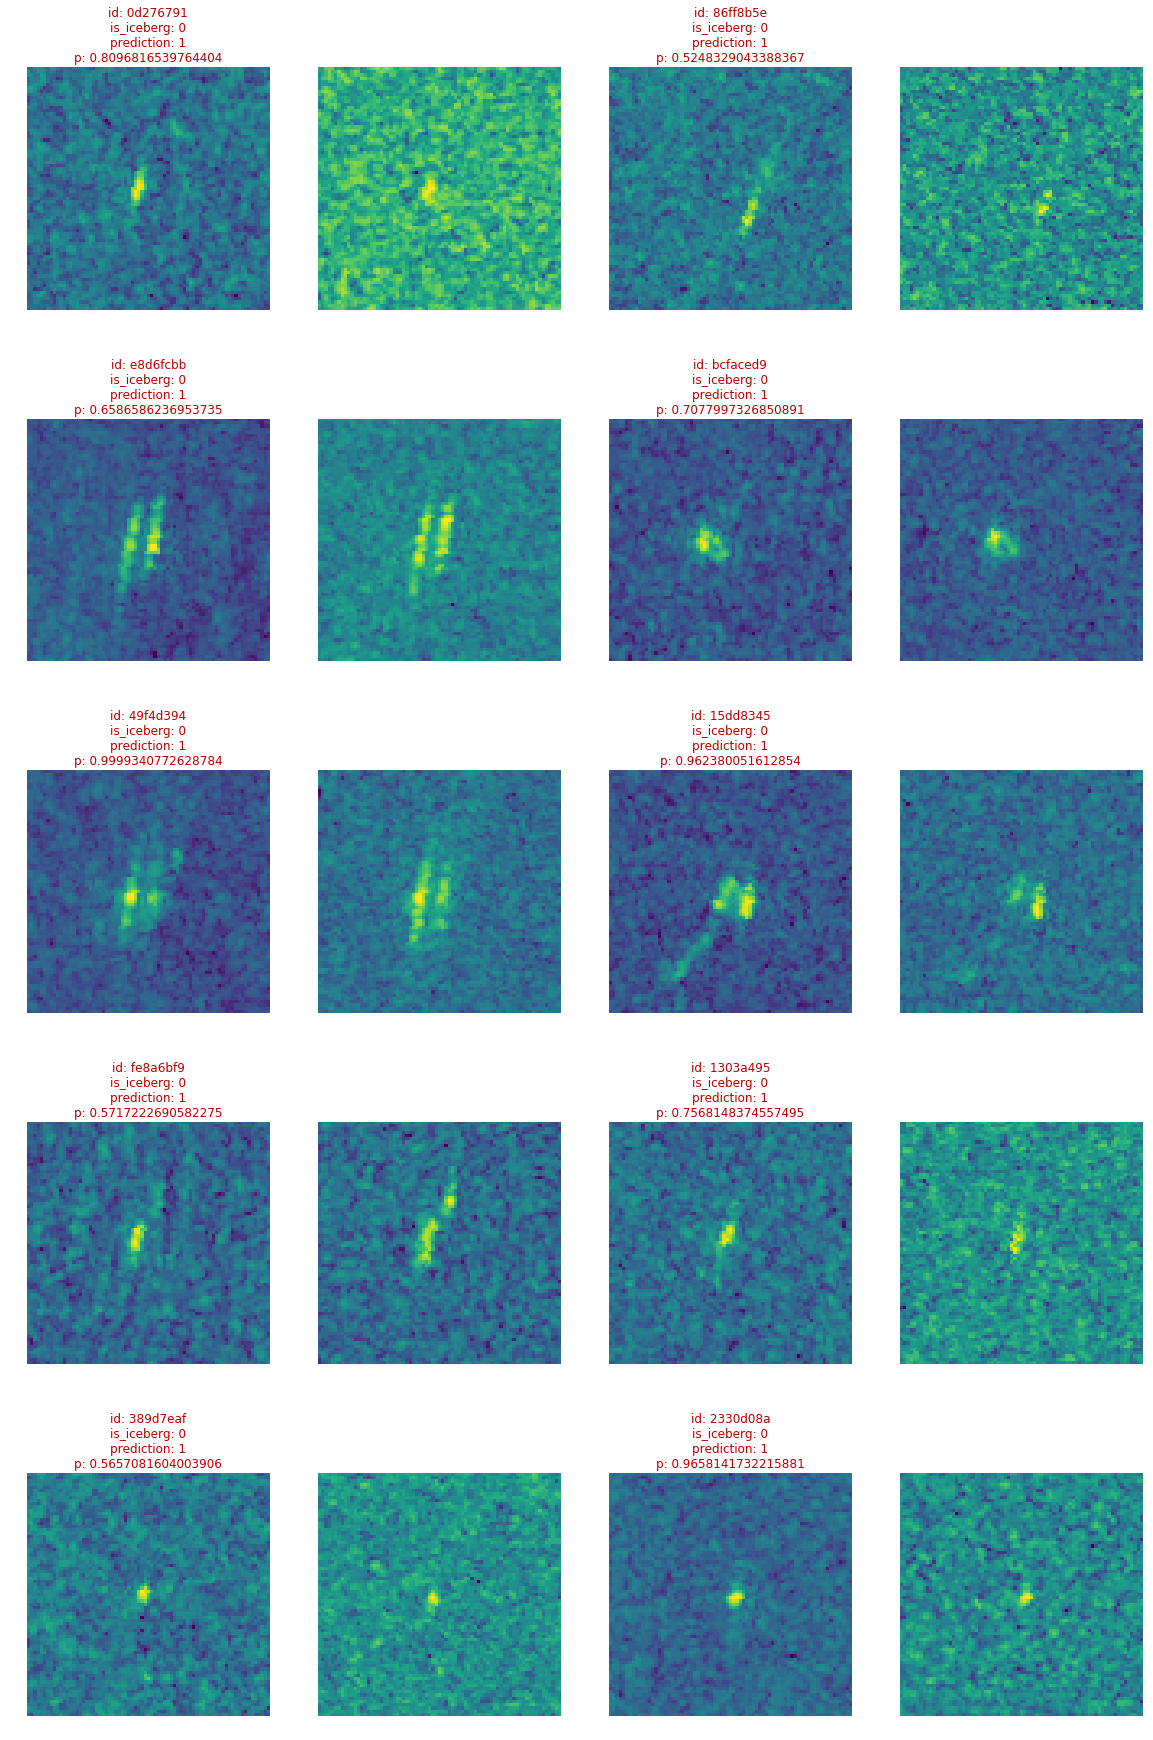

In [15]:
evaluator.plot_predictions(is_iceberg=0, prediction=1)

# False negatives

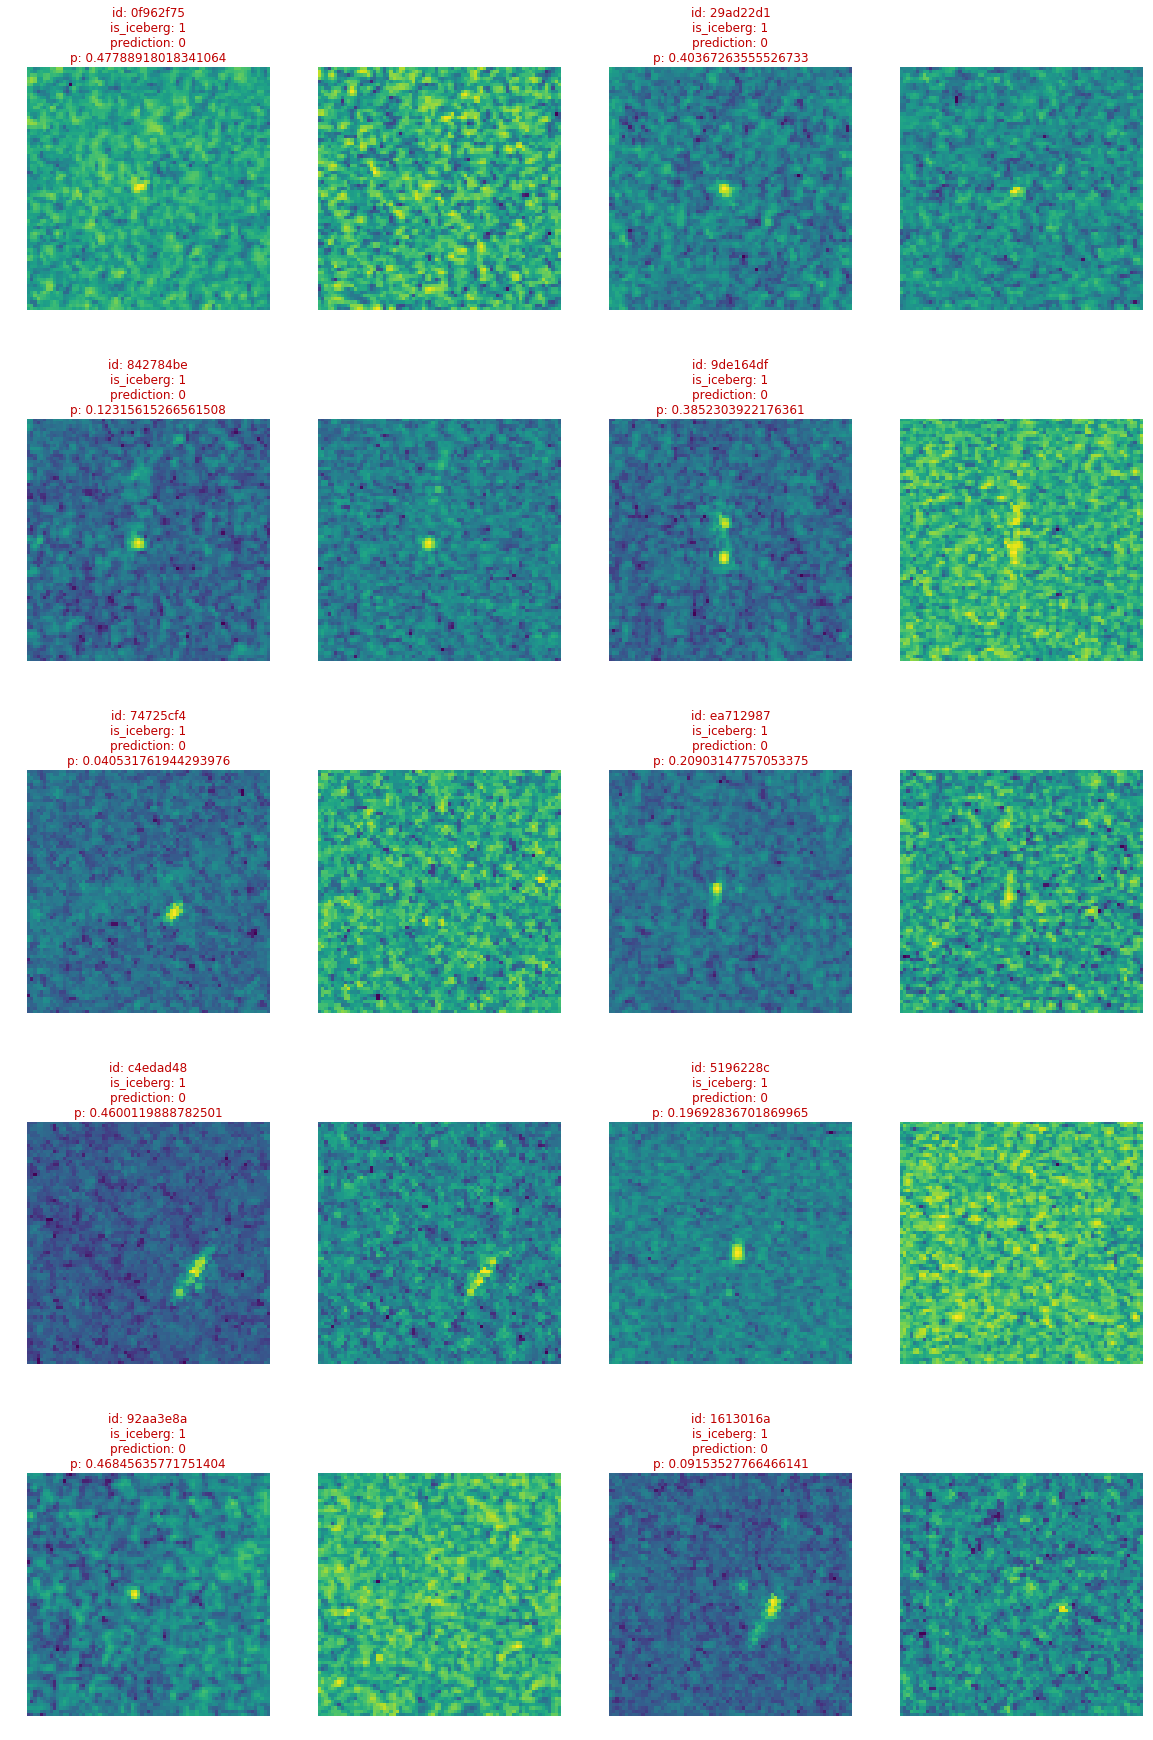

In [17]:
evaluator.plot_predictions(is_iceberg=1, prediction=0)

In [18]:
# True positives

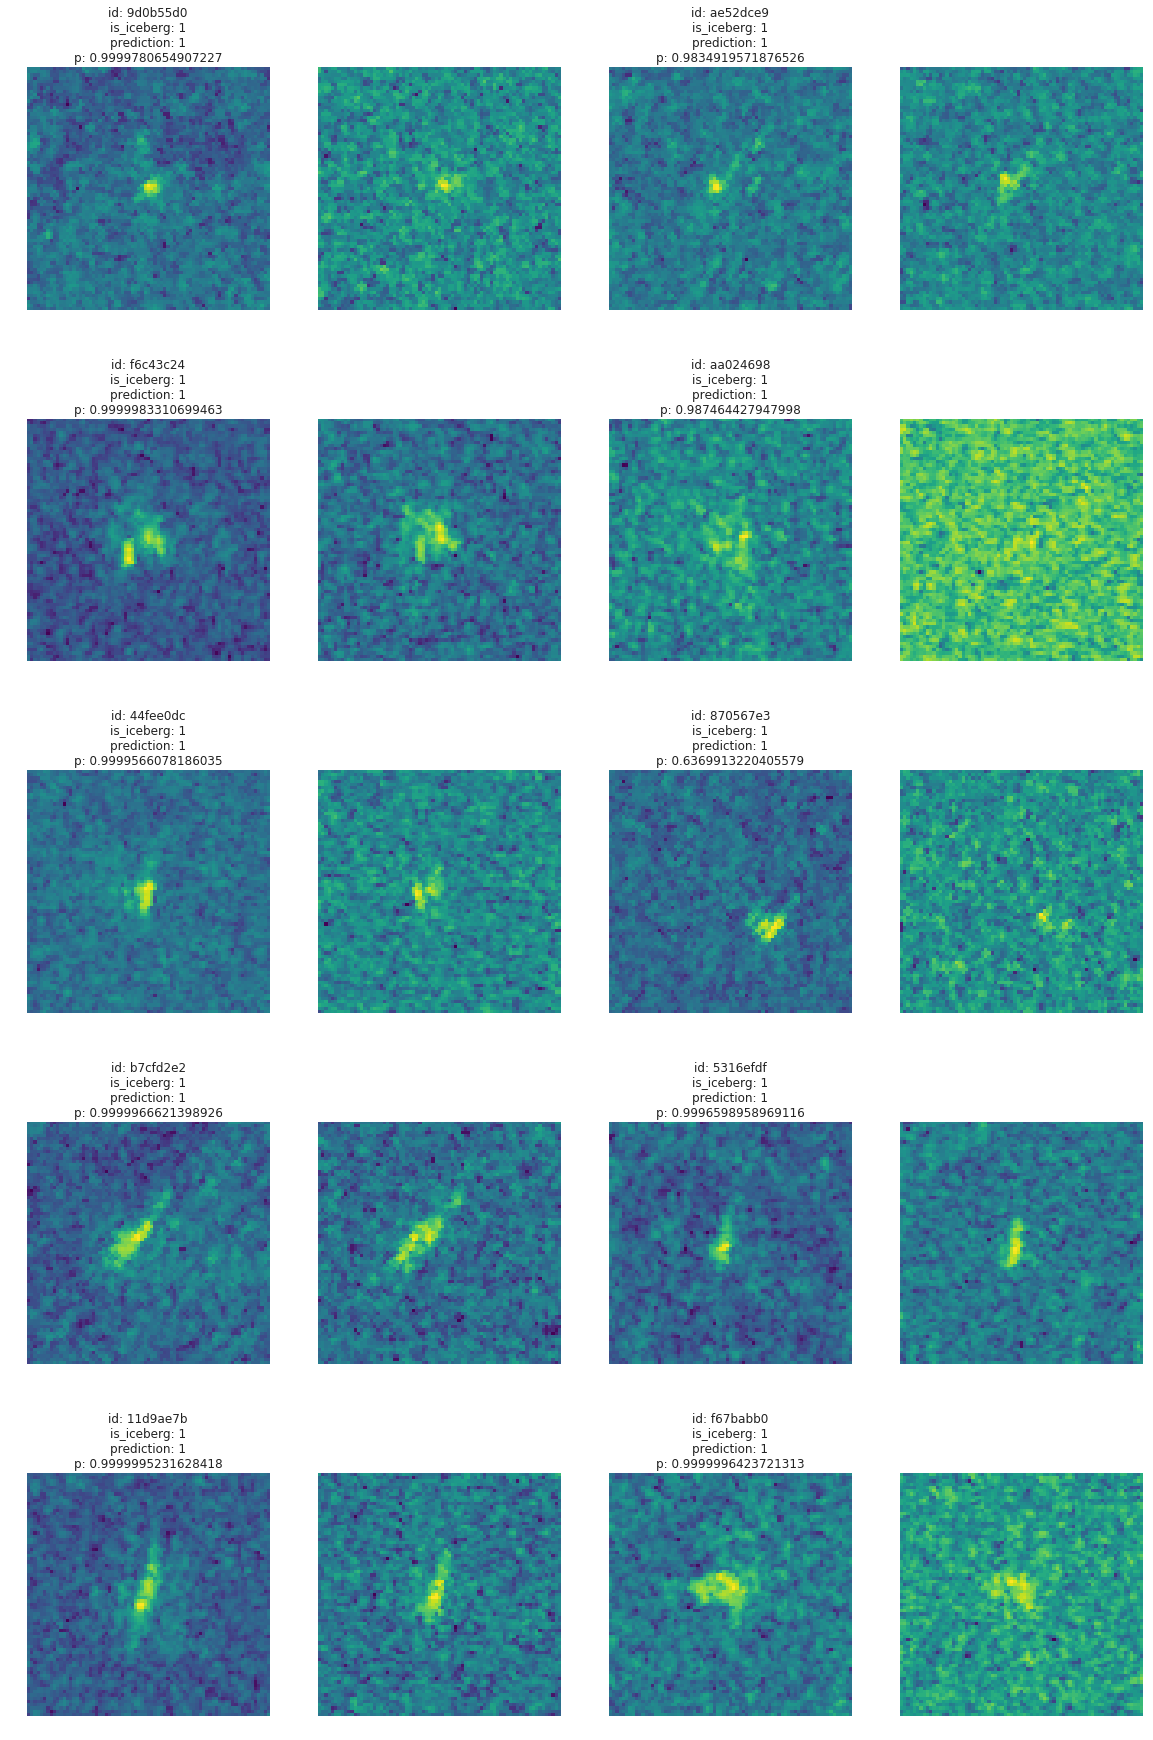

In [19]:
evaluator.plot_predictions(is_iceberg=1, prediction=1)

In [20]:
# True negatives

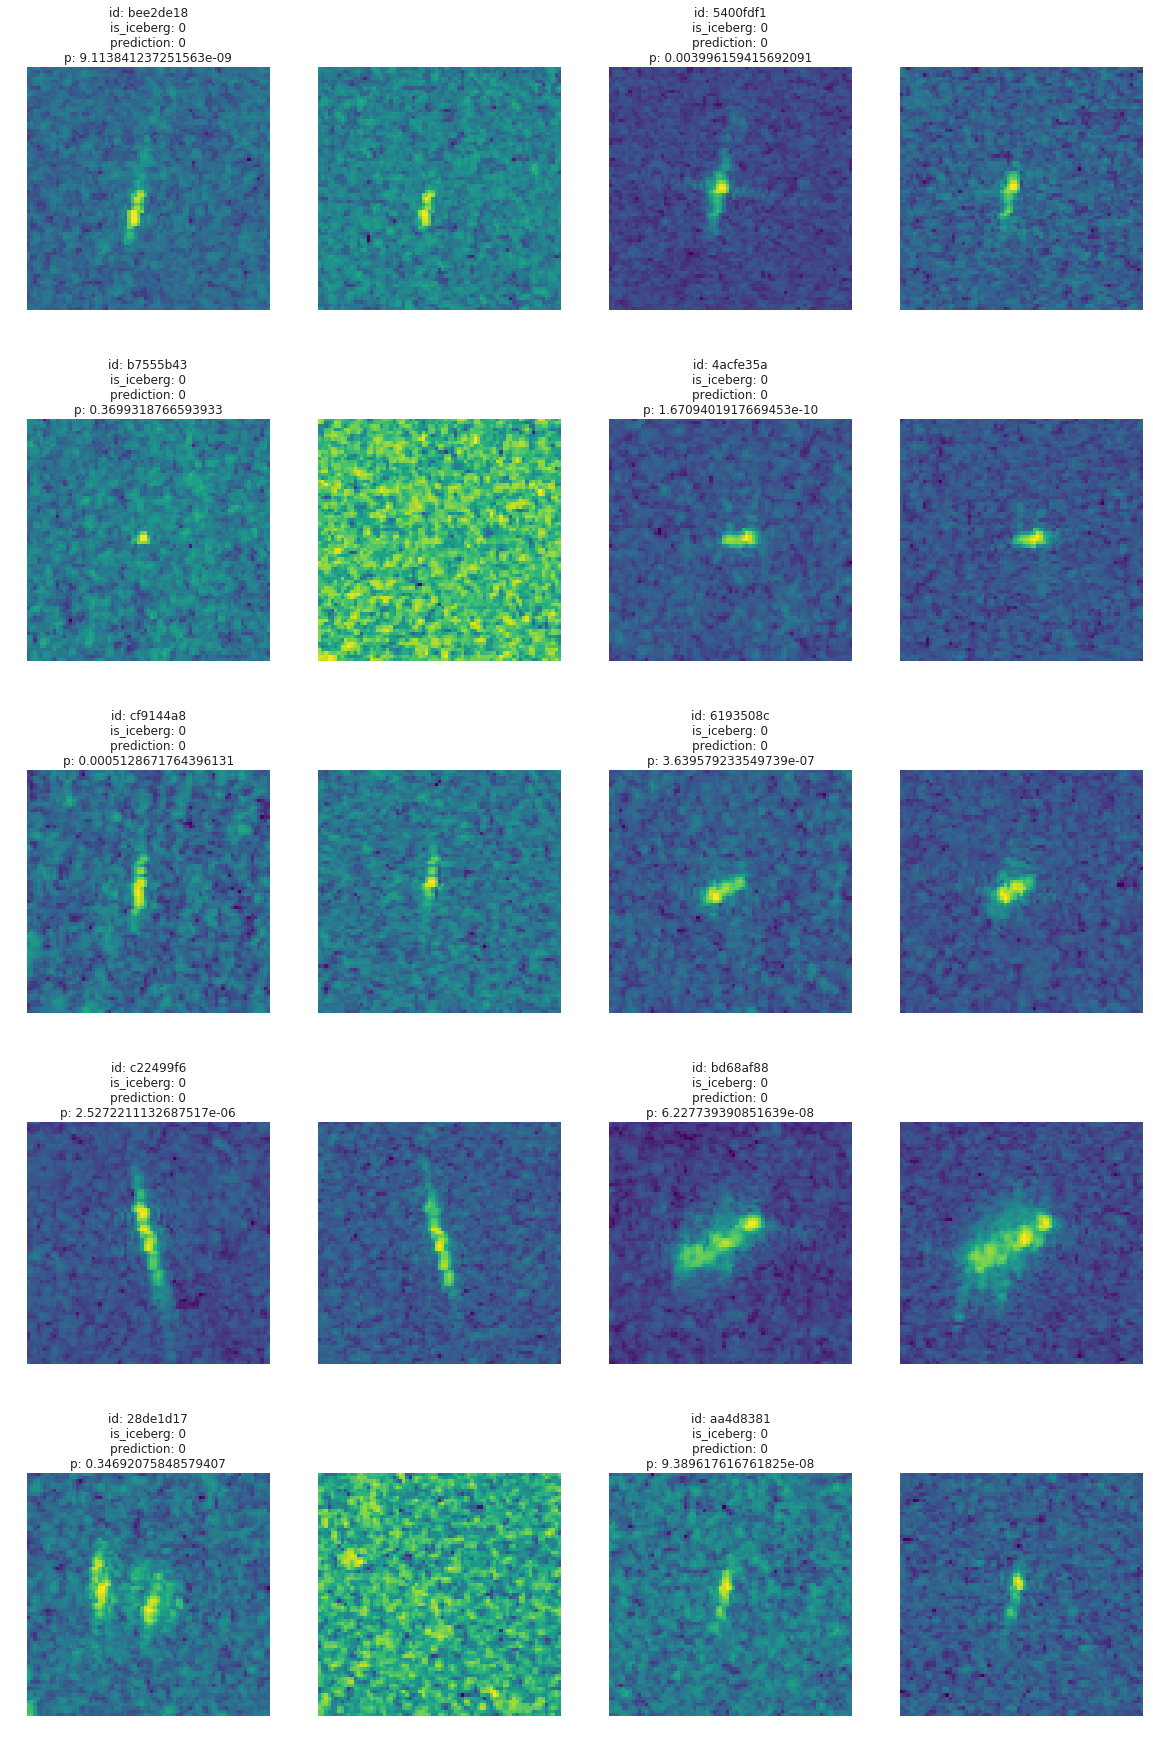

In [21]:
evaluator.plot_predictions(is_iceberg=0, prediction=0)